In [21]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
nltk.download('vader_lexicon') #Download VADER Dictioncry
nltk.download('stopwords')#Stop word corpus

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# Load the dataset
file_path = '/content/dreaddit-train.csv'
data = pd.read_csv(file_path)
data.info() #Read the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [24]:

# Preprocessing the text
# We'll use CountVectorizer for this, with English stop words removed
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(data['text'])

# LDA Topic Modeling
# Let's start with 5 topics for initial exploration
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(dtm)

# Function to display words associated with each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")

# Displaying the top 10 words for each topic
#The output results are shown in the Word document Figure 1

display_topics(LDA, cv.get_feature_names_out(), 10)


Topic 0:
ve just years time told really friends life year didn
Topic 1:
like feel just don know anxiety time really want ve
Topic 2:
help url time need money pay thank know family ve
Topic 3:
like just feel really time ve don started help feeling
Topic 4:
just don know want time feel help like got said




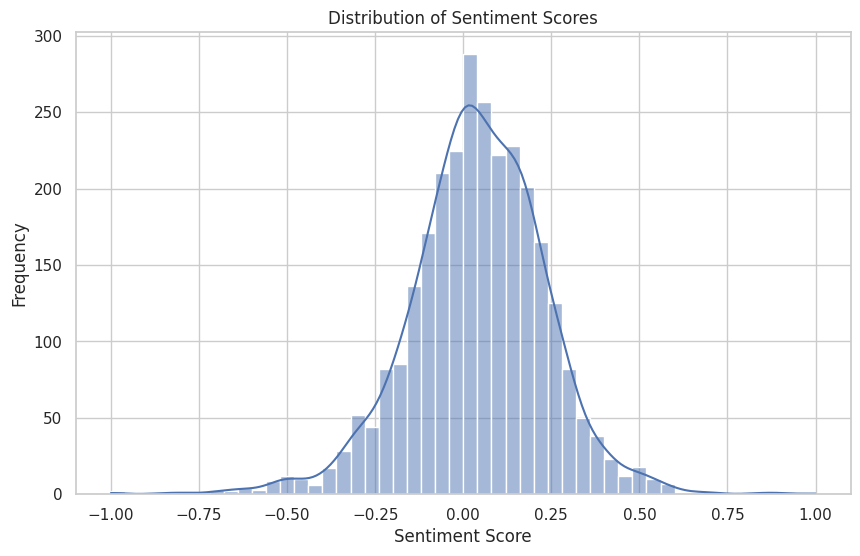

In [25]:

sns.set(style="whitegrid")

# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['sentiment'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show() #The output results are shown in the Word document Figure 2

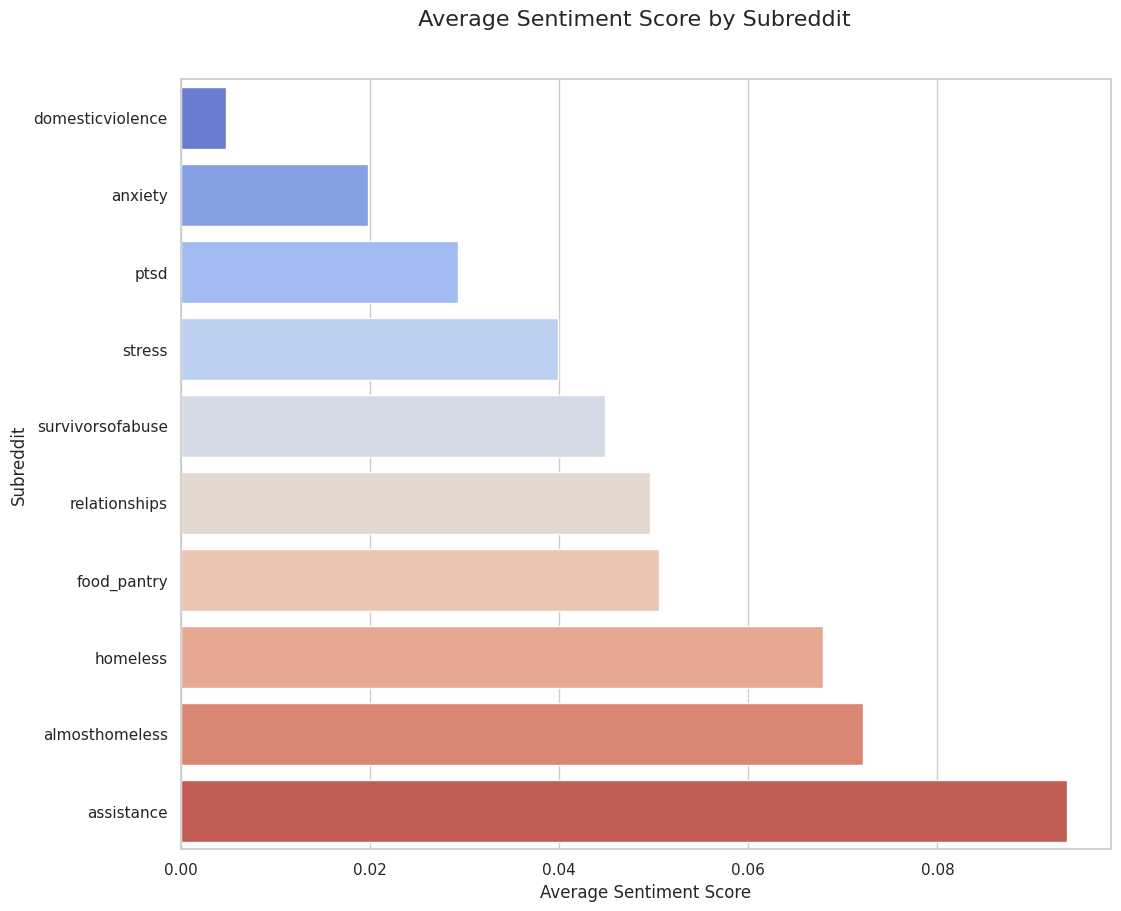

In [26]:

# Calculating the average sentiment for each subreddit

subreddit_sentiment = data.groupby('subreddit')['sentiment'].mean().reset_index()

# Filtering out subreddits with very few posts to ensure meaningful averages
# Consider subreddits with at least 10 posts for this analysis
subreddit_counts = data['subreddit'].value_counts()
subreddits_to_include = subreddit_counts[subreddit_counts >= 10].index
filtered_subreddit_sentiment = subreddit_sentiment[subreddit_sentiment['subreddit'].isin(subreddits_to_include)]

# Sorting the subreddits based on average sentiment
sorted_subreddit_sentiment = filtered_subreddit_sentiment.sort_values(by='sentiment')

# Plotting
plt.figure(figsize=(12, 10))
sns.barplot(x='sentiment', y='subreddit', data=sorted_subreddit_sentiment, palette='coolwarm')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Subreddit')


plt.suptitle(' Average Sentiment Score by Subreddit', y=0.95, fontsize=16, ha='center')

plt.show() #The output results are shown in the Word document Figure 3.


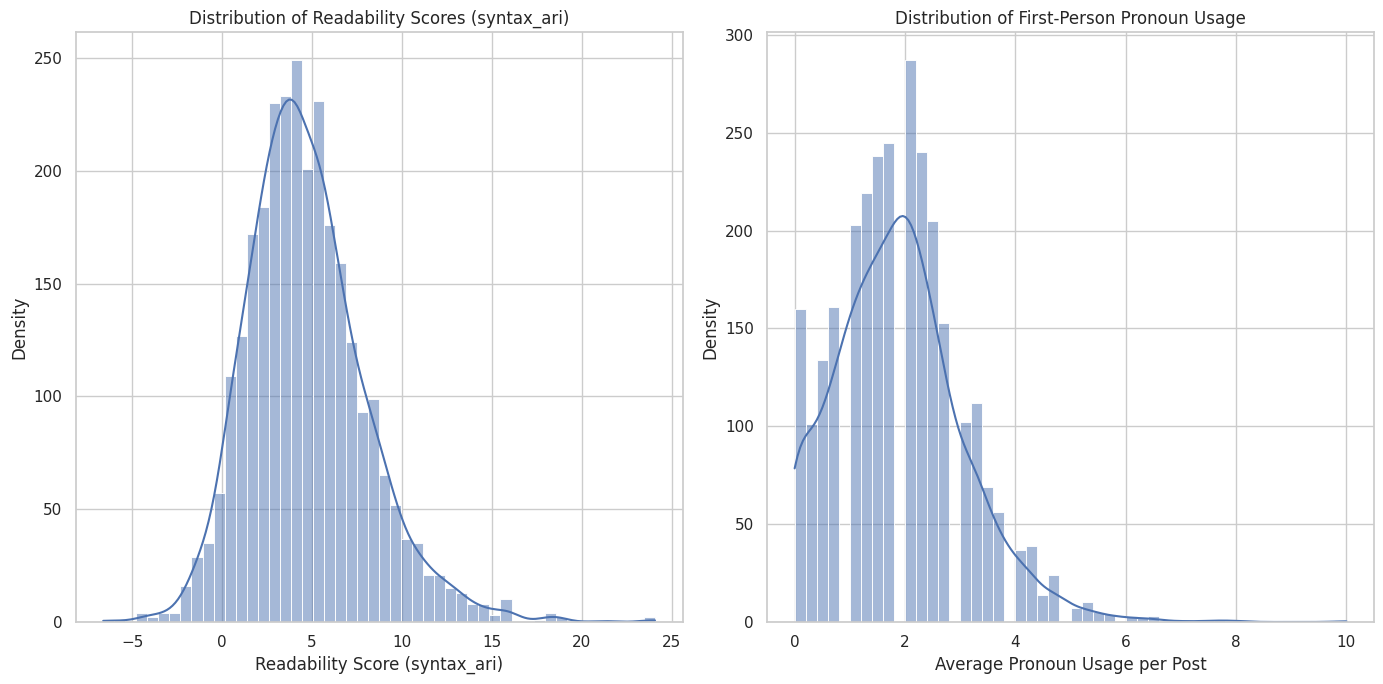

(                         i        me        my      mine
 subreddit                                               
 almosthomeless    5.312500  0.787500  1.837500  0.000000
 anxiety           5.844930  1.017893  1.739563  0.007952
 assistance        3.712803  0.588235  1.422145  0.017301
 domesticviolence  4.332278  1.455696  1.664557  0.006329
 food_pantry       3.756757  0.594595  1.324324  0.000000
 homeless          4.898810  0.785714  1.470238  0.011905
 ptsd              5.256849  0.974315  1.621575  0.008562
 relationships     4.750000  1.322464  1.413043  0.028986
 stress            4.250000  0.750000  1.625000  0.000000
 survivorsofabuse  4.791837  1.346939  1.571429  0.020408,
             syntax_ari  sentiment
 syntax_ari    1.000000   0.078454
 sentiment     0.078454   1.000000)

In [27]:
# Adding columns for first-person pronouns
pronouns = ['i', 'me', 'my', 'mine']
for pronoun in pronouns:
    data[pronoun] = data['text'].str.lower().str.count(r'\b{}\b'.format(pronoun))

# Calculate the average use of pronouns for each subreddit
pronoun_usage = data.groupby('subreddit')[pronouns].mean()

# Correlation between readability and sentiment
readability_sentiment_corr = data[['syntax_ari', 'sentiment']].corr()

# Visualize the distribution of readability scores and pronoun usage
plt.figure(figsize=(14, 7))

# Distribution of readability scores
plt.subplot(1, 2, 1)
sns.histplot(data['syntax_ari'], bins=50, kde=True)
plt.title('Distribution of Readability Scores (syntax_ari)')
plt.xlabel('Readability Score (syntax_ari)')
plt.ylabel('Density')

# Distribution of first-person pronouns
plt.subplot(1, 2, 2)
sns.histplot(data[pronouns].mean(axis=1), bins=50, kde=True)
plt.title('Distribution of First-Person Pronoun Usage')
plt.xlabel('Average Pronoun Usage per Post')
plt.ylabel('Density')

#Print the Graphics
plt.tight_layout()
plt.show()#The output results are shown in the Word document Figure 5.1 and 5.2

# Print the calculated data
#The output results are shown in the Word document Figure 4
pronoun_usage, readability_sentiment_corr


In [28]:
# Calculate the correlation matrix for the selected variables.
# Include sentiment, social_karma, syntax_ari, and social_upvote_ratio in our analysis.

# Selecting relevant columns for correlation analysis
columns_for_correlation = ['sentiment', 'social_karma', 'syntax_ari', 'social_upvote_ratio']

# Computing the correlation matrix
correlation_matrix = data[columns_for_correlation].corr()

# Print results
#The output results are shown in the Word document Figure 6
correlation_matrix


,sentiment,social_karma,syntax_ari,social_upvote_ratio
sentiment,1.000000,0.004918,0.078454,-0.073087
social_karma,0.004918,1.000000,-0.014104,0.099256
syntax_ari,0.078454,-0.014104,1.000000,-0.006797
social_upvote_ratio,-0.073087,0.099256,-0.006797,1.000000
